In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geometry_tools as gt
import convex_hull
import separability as sep

plt.ion()

In [2]:
df = pd.read_csv('iris.csv') # Separavel
#df = pd.read_csv('banana.csv') # Não separavel

P1 = df.query("t == ' Iris-setosa'").reset_index()[['x', 'y']]
P2 = df.query("t == ' Iris-versicolor'").reset_index()[['x', 'y']]
#P1 = df.query("t == -1").reset_index()[['x', 'y']]
#P2 = df.query("t == 1").reset_index()[['x', 'y']]

P1 = P1.values.tolist()
P2 = P2.values.tolist()

In [15]:
H1 = sep.convex_segments(P1)
H2 = sep.convex_segments(P2)

separavel = sep.separability(H1, H2)

if separavel == False:
    class1, class2 = sep.class_model(H1, H2)

    points = sep.shortest_points(H1, H2)
    pm = gt.Point(((points[0].x + points[1].x)/2), ((points[0].y + points[1].y)/2))
    val = min(max(H1, key=lambda p: p.x).x, max(H1, key=lambda p:p.y).y)
    line = [gt.Point(pm.x - val, pm.y + val), gt.Point(pm.x + val, pm.y - val)]

print(separavel)

False


In [16]:
CH1 = H1
CH2 = H2
CH1.append(H1[0])
CH2.append(H2[0])

x, y = [], []
for i in CH1:
    x.append(i.x)
    y.append(i.y)

w, z = [], []
for i in CH2:
    w.append(i.x)
    z.append(i.y)

In [17]:
if separavel == False:
    a, b = [], []  
    for i in class1:
        a.append(i.x)
        b.append(i.y)
    
    c, d = [], []  
    for i in class2:
        c.append(i.x)
        d.append(i.y)
    
    e, f = [], []  
    for i in line:
        e.append(i.x)
        f.append(i.y)

    g, h = [], []
    for i in points:
        g.append(i.x)
        h.append(i.y)

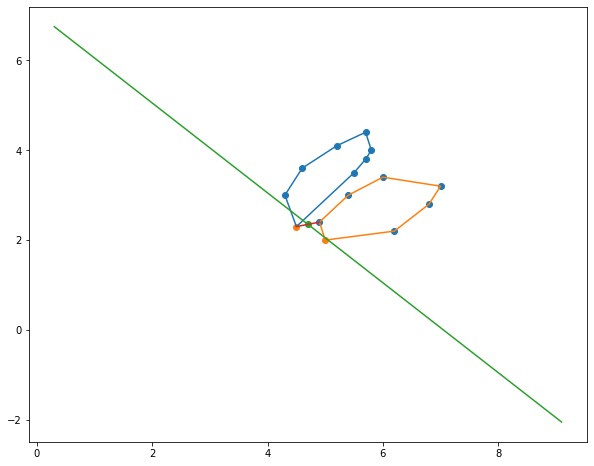

In [22]:
plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.plot(w, z)

if separavel == False:
    plt.plot(e, f)
    plt.plot(g, h)

    plt.scatter(a, b)
    plt.scatter(c, d)
    plt.scatter(pm.x, pm.y)